In [2]:
import ee
ee.Authenticate()



Successfully saved authorization token.


In [3]:
ee.Initialize(project='astrotourism-darksky')
print("Earth engine initialized")

Earth engine initialized


⏳ Fetching VIIRS data for 7 regions (2014 to 2023)...
Data Ready:
   Year                Region   Radiance
0  2014        Ladakh (Hanle)   0.142303
1  2014          Spiti Valley   0.187357
2  2014         Rann of Kutch   0.103696
3  2014     Nilgiri (Wayanad)   1.401984
4  2014  Varanasi (Urban Ref)  24.541502


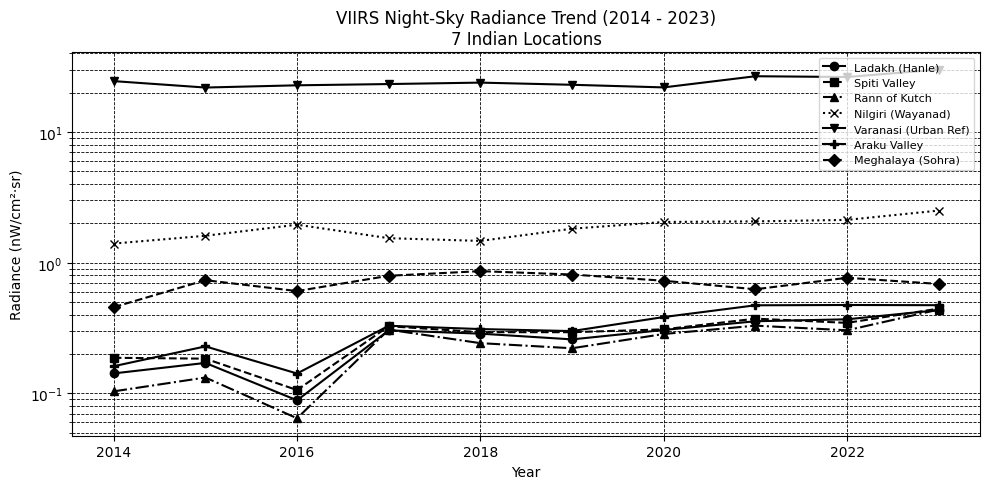

Completed — 10-year ROI trend plotted successfully (lightweight run)


In [8]:
import pandas as pd
import matplotlib.pyplot as plt

print("⏳ Fetching VIIRS data for 7 regions (2014 to 2023)...")

# Define Regions of Interest (POINTS)
rois = {
    "Ladakh (Hanle)": ee.Geometry.Point(78.96, 32.78),
    "Spiti Valley": ee.Geometry.Point(78.00, 32.30),
    "Rann of Kutch": ee.Geometry.Point(69.80, 23.80),
    "Nilgiri (Wayanad)": ee.Geometry.Point(76.50, 11.50),
    "Varanasi (Urban Ref)": ee.Geometry.Point(82.98, 25.32),
    "Araku Valley": ee.Geometry.Point(83.00, 18.33),
    "Meghalaya (Sohra)": ee.Geometry.Point(91.73, 25.26)
}

# Years to analyze (10 years)
years = list(range(2014, 2024))

rows = []

for year in years:
    start = f"{year}-01-01"
    end = f"{year}-12-31"

    viirs = ee.ImageCollection("NOAA/VIIRS/DNB/MONTHLY_V1/VCMSLCFG")\
        .filterDate(start, end)\
        .select("avg_rad")\
        .mean()

    for region, geometry in rois.items():
        value = viirs.reduceRegion(
            reducer=ee.Reducer.mean(),
            geometry=geometry,
            scale=500
        ).get("avg_rad")

        value=ee.Number(value).getInfo()
        rows.append([year, region, value])

# Convert to DataFrame
df = pd.DataFrame(rows, columns=["Year", "Region", "Radiance"])

print("Data Ready:")
print(df.head())

# ---------------------
# Plot trends
# ---------------------
plt.figure(figsize=(10,5))

styles={ "Ladakh (Hanle)":('o','-'),
          "Spiti Valley":('s','--'),
          "Rann of Kutch":('^','-.'),
         "Nilgiri (Wayanad)":('x',':'),
          "Varanasi (Urban Ref)":('v','-'),
          "Araku Valley":('P','-'),
          "Meghalaya (Sohra)":('D','--')
        }

for region in df["Region"].unique():
    sub = df[df["Region"] == region]
    marker,line=styles[region]
    plt.semilogy(sub["Year"], sub["Radiance"], marker=marker, linestyle= line,color='black', label=region)

plt.title("VIIRS Night-Sky Radiance Trend (2014 - 2023)\n7 Indian Locations")
plt.xlabel("Year")
plt.ylabel("Radiance (nW/cm²·sr)")
plt.grid(True,which="both",linestyle="--",color="black",linewidth=0.6)
plt.legend(fontsize=8)
plt.tight_layout()
plt.savefig('viirs output b and w magazine version dpi300.png', dpi=300,bbox_inches='tight')
plt.show()
print("Completed — 10-year ROI trend plotted successfully (lightweight run)")



In [6]:
print(df)
df.to_csv("dark_sky_viirs_timeseries.csv",index=False)

    Year                Region   Radiance
0   2014        Ladakh (Hanle)   0.142303
1   2014          Spiti Valley   0.187357
2   2014         Rann of Kutch   0.103696
3   2014     Nilgiri (Wayanad)   1.401984
4   2014  Varanasi (Urban Ref)  24.541502
..   ...                   ...        ...
65  2023         Rann of Kutch   0.438333
66  2023     Nilgiri (Wayanad)   2.507500
67  2023  Varanasi (Urban Ref)  30.080000
68  2023          Araku Valley   0.473333
69  2023     Meghalaya (Sohra)   0.688333

[70 rows x 3 columns]
